[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/hello_world_tutorial.ipynb)

# Hello world: Planet Kornia

Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org).

This is the first tutorial that show how one can simply start loading images with [Torchvision](https://pytorch.org/vision), [Kornia](https://kornia.org) and [OpenCV](https://opencv.org).


In [1]:
%%capture
!pip install kornia

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

Download first an image form internet to start to work.


In [3]:
%%capture
!wget https://github.com/kornia/data/raw/main/arturito.jpg

## Load an image with OpenCV

We can use OpenCV to load an image. By default, OpenCV loads images in BGR format and casts to a `numpy.ndarray` with the data layout `(H,W,C)`. 

However, because matplotlib saves an image in RGB format, in OpenCV you need to change the BGR to RGB so that an image is displayed properly.

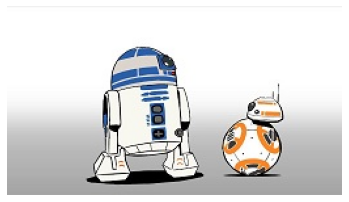

In [4]:
img_bgr: np.array = cv2.imread('arturito.jpg')  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.axis('off');

## Load an image with Torchvision

The images can be also loaded using `torchvision` which directly returns the images in a `torch.Tensor` in the shape `(C,H,W)`.



In [5]:
x_rgb: torch.tensor = torchvision.io.read_image('arturito.jpg')  # CxHxW / torch.uint8
x_rgb = x_rgb.unsqueeze(0)  # BxCxHxW
print(x_rgb.shape)

torch.Size([1, 3, 144, 256])


## Load an image with Kornia

With Kornia we can do all the preceding.

We have a couple of utilities to cast the image to a `torch.Tensor` to make it compliant to the other Kornia components and arrange the data in `(B,C,H,W)`.  

 The utility is [`kornia.image_to_tensor`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which casts a `numpy.ndarray` to a `torch.Tensor` and permutes the channels to leave the image ready for being used with any other PyTorch or Kornia component.  
The image is casted into a 4D `torch.Tensor` with zero-copy.



In [6]:
x_bgr: torch.tensor = K.image_to_tensor(img_bgr)  # CxHxW / torch.uint8
x_bgr = x_bgr.unsqueeze(0)  # 1xCxHxW
print(f"convert from '{img_bgr.shape}' to '{x_bgr.shape}'")

convert from '(144, 256, 3)' to 'torch.Size([1, 3, 144, 256])'


We can convert from BGR to RGB with a [`kornia.color`](https://kornia.readthedocs.io/en/latest/color.html) component.


In [7]:
x_rgb: torch.tensor = K.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8

## Visualize an image with Matplotib

We will use [Matplotlib](https://matplotlib.org/) for the visualisation inside the notebook. Matplotlib requires a `numpy.ndarray` in the `(H,W,C)` format, and for doing so we will go back with [`kornia.tensor_to_image`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which will convert the image to the correct format.



In [8]:
img_bgr: np.array = K.tensor_to_image(x_bgr)
img_rgb: np.array = K.tensor_to_image(x_rgb)

Create a subplot to visualize the original an a modified image



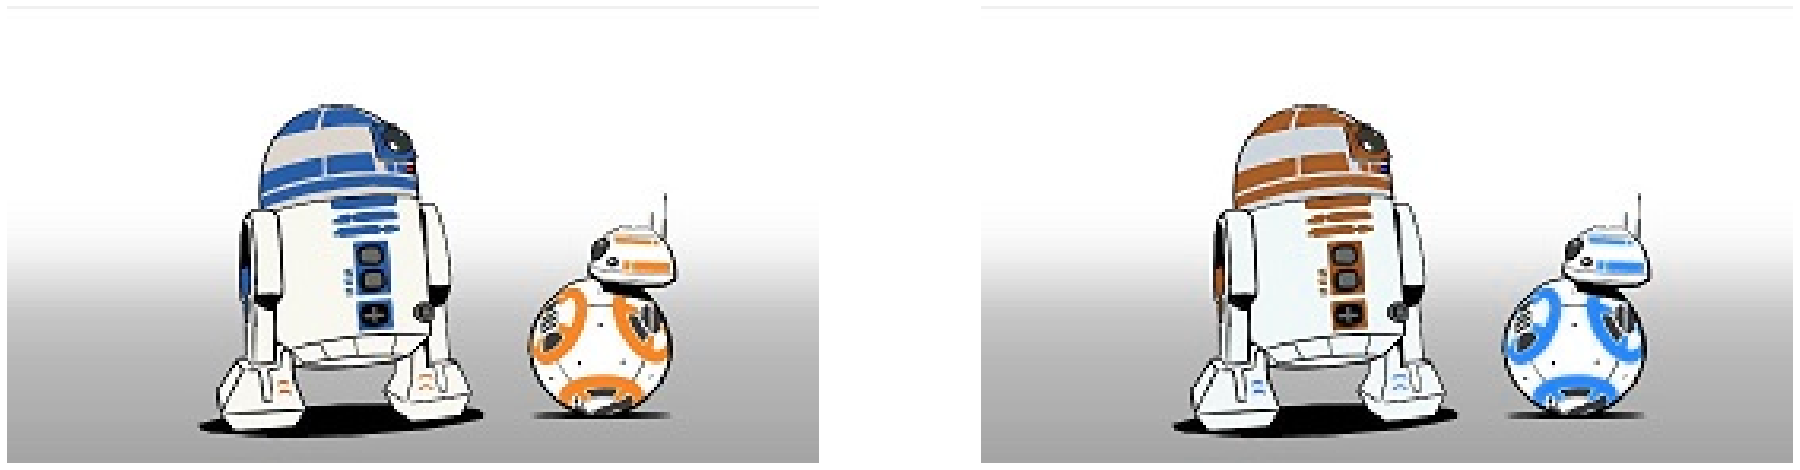

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].imshow(img_bgr)

plt.show()